<h1 style="text-align: center">Choosing the best coffee</h1>

Back in March, [TowardsDataScience.com](https://towardsdatascience.com) published [an article](https://towardsdatascience.com/the-data-speak-ethiopia-has-the-best-coffee-91f88ed37e84) that analyzed a coffee dataset from the [Coffee Quality Institute](https://www.coffeeinstitute.org/) (sounds like a great place to work!).  Since I'm always looking for cool datasets to work with and since I love coffee, I thought this would be a great dataset to [pull down](https://github.com/jldbc/coffee-quality-database) and visualize in some fashion.

In the article, the author visualizes median coffee data from several countries around the world in polar charts.  The polar charts worked well to get all to get all 11 features on the chart at the same time, but every polar chart--from Ethiopia to the United States--looked the same.  It was difficult to see how one country's coffee differed from another's.  I wonder if there might be a better way to show the subtle variations among each country's coffee?  Enter in another article [I talked about previously](https://dadoverflow.com/2019/04/01/college-tuition-vs-starting-salary/): [Top 50 matplotlib Visualizations](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/).  I thought one chart in particular from that article, the [Diverging Bars Chart](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#10.-Diverging-Bars), might do the trick.  

Since each country can produce tens of different brands of coffee, I followed the lead of the original article and grabbed the median value from each country.  I then applied the Diverging Bars technique to plot how far each country's coffee varied from the mean.

One thing that puzzles me, though: in several of the categories, Papua New Guinea comes out on top.  Yet if you look at the [original article](https://towardsdatascience.com/the-data-speak-ethiopia-has-the-best-coffee-91f88ed37e84), the author lists the median Ethiopian coffee as coming out on top more often than not.  What's the reason for this discrepency?  I'm not really sure.  I think I calculated the medians correctly--my Ethiopian values match the author's.  Perhaps I'm working from a newer dataset than he did. 

At any rate, I accomplished my main goal of creating some cool diverging bar charts.  Enjoy with your favorite cup of java!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline
style.use('seaborn')

In [3]:
# https://github.com/jldbc/coffee-quality-database
df_coffee = pd.read_csv('./data/arabica_data_cleaned.csv')
df_coffee.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [15]:
features = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 
            'Sweetness', 'Moisture']

for feature in features:
    print(feature)
    print(df_coffee.groupby('Country.of.Origin').median().loc[:, [feature]].reset_index().sort_values(feature, ascending=False).head(3))

Aroma
   Country.of.Origin  Aroma
23  Papua New Guinea   8.33
31     United States   8.00
30            Uganda   7.92
Flavor
   Country.of.Origin  Flavor
23  Papua New Guinea    8.42
31     United States    8.29
8           Ethiopia    7.96
Aftertaste
   Country.of.Origin  Aftertaste
31     United States       8.125
8           Ethiopia       7.830
23  Papua New Guinea       7.830
Acidity
   Country.of.Origin  Acidity
23  Papua New Guinea     8.33
31     United States     8.17
8           Ethiopia     8.00
Body
   Country.of.Origin  Body
14             Japan  8.08
31     United States  8.04
23  Papua New Guinea  8.00
Balance
   Country.of.Origin  Balance
23  Papua New Guinea     8.25
31     United States     8.04
8           Ethiopia     7.92
Uniformity
   Country.of.Origin  Uniformity
0             Brazil        10.0
16              Laos        10.0
34           Vietnam        10.0
Clean.Cup
   Country.of.Origin  Clean.Cup
0             Brazil       10.0
17            Malawi       10.

One thing that puzzles me: in several of the categories, Papua New Guinea comes out on top.  Yet if you look at the [original article](https://towardsdatascience.com/the-data-speak-ethiopia-has-the-best-coffee-91f88ed37e84), the author lists the median Ethiopia coffee as coming out on top more often than not.  What's the reason for this discrepency?  I'm not really sure.  I think I calculated the medians correctly--my Ethiopian values match the author's.  Perhaps I'm working from a newer dataset than he did.  

In [5]:
def generate_chart(feature_to_chart, xlabel, title):
    df_chart = df_coffee.groupby('Country.of.Origin').median().loc[:, [feature_to_chart]].reset_index()
    df_chart['z'] = (df_chart[feature_to_chart] - df_chart[feature_to_chart].mean()) / df_chart[feature_to_chart].std()

    df_chart['colors'] = ['red' if x < 0 else 'green' for x in df_chart['z']]
    df_chart.sort_values('z', inplace=True)
    df_chart.reset_index(inplace=True)

    # draw plot
    plt.figure(figsize=(14,10), dpi=80)
    plt.hlines(y=df_chart.index, xmin=0, xmax=df_chart.z, color=df_chart.colors, alpha=0.4, linewidth=5)

    # decorations
    plt.gca().set(ylabel='$Country$', xlabel=xlabel)
    plt.yticks(df_chart.index, df_chart['Country.of.Origin'], fontsize=12)
    plt.title(title, fontdict={'size':20})
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()

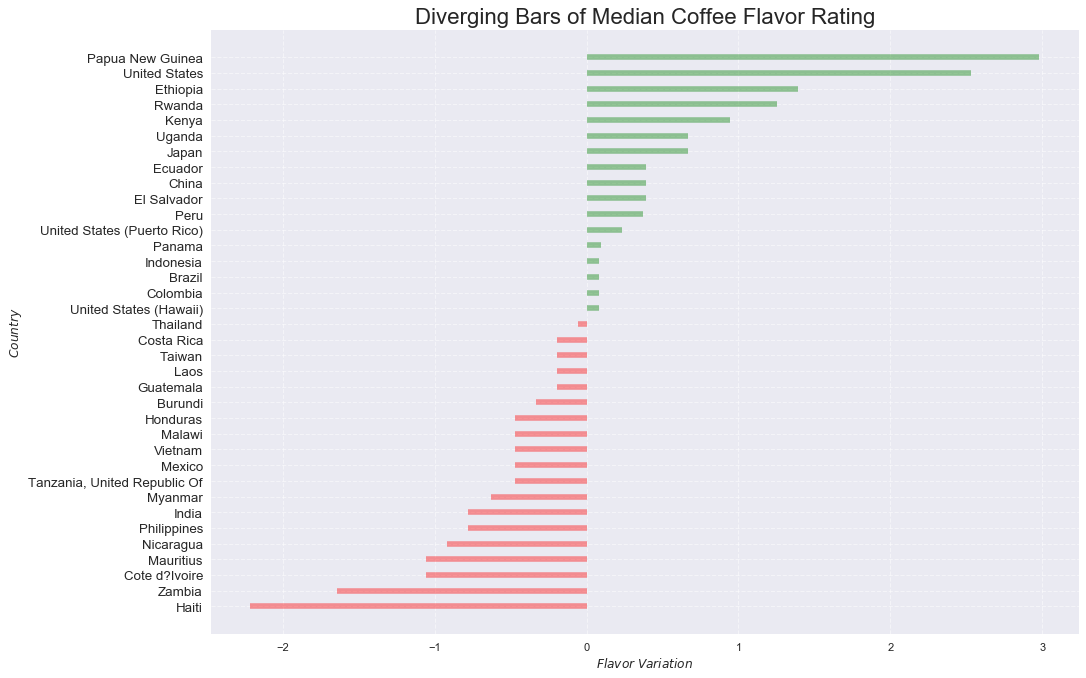

In [6]:
feature_to_chart = 'Flavor'
xlabel = '${0}$ $Variation$'.format(feature_to_chart)
title = 'Diverging Bars of Median Coffee {0} Rating'.format(feature_to_chart)

generate_chart(feature_to_chart, xlabel, title)

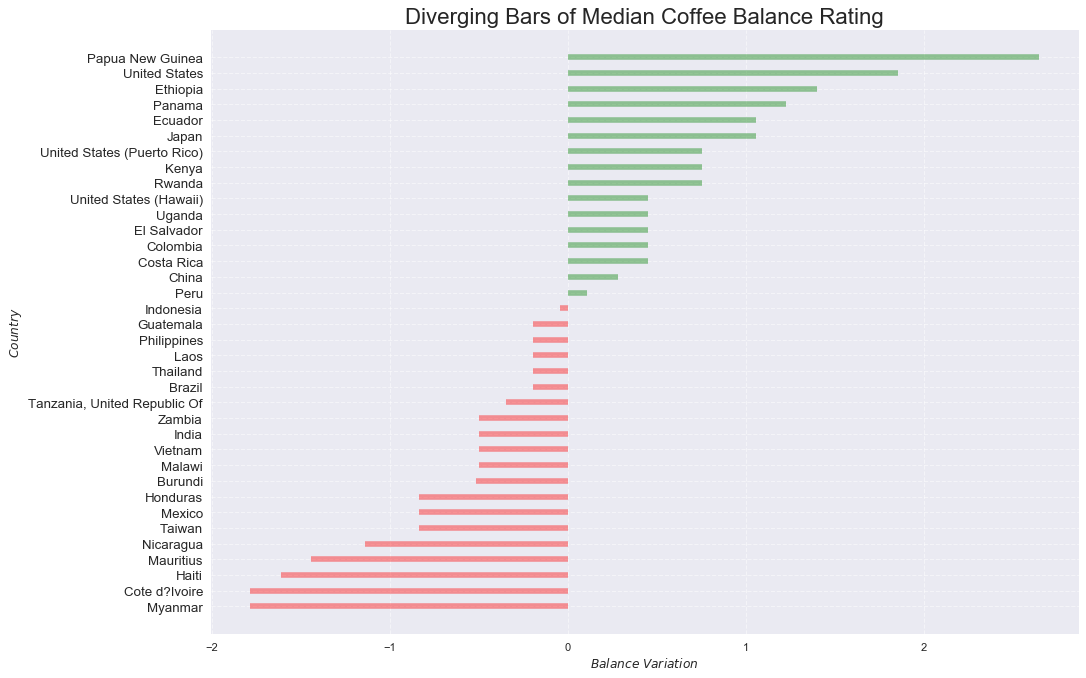

In [7]:
feature_to_chart = 'Balance'
xlabel = '${0}$ $Variation$'.format(feature_to_chart)
title = 'Diverging Bars of Median Coffee {0} Rating'.format(feature_to_chart)

generate_chart(feature_to_chart, xlabel, title)

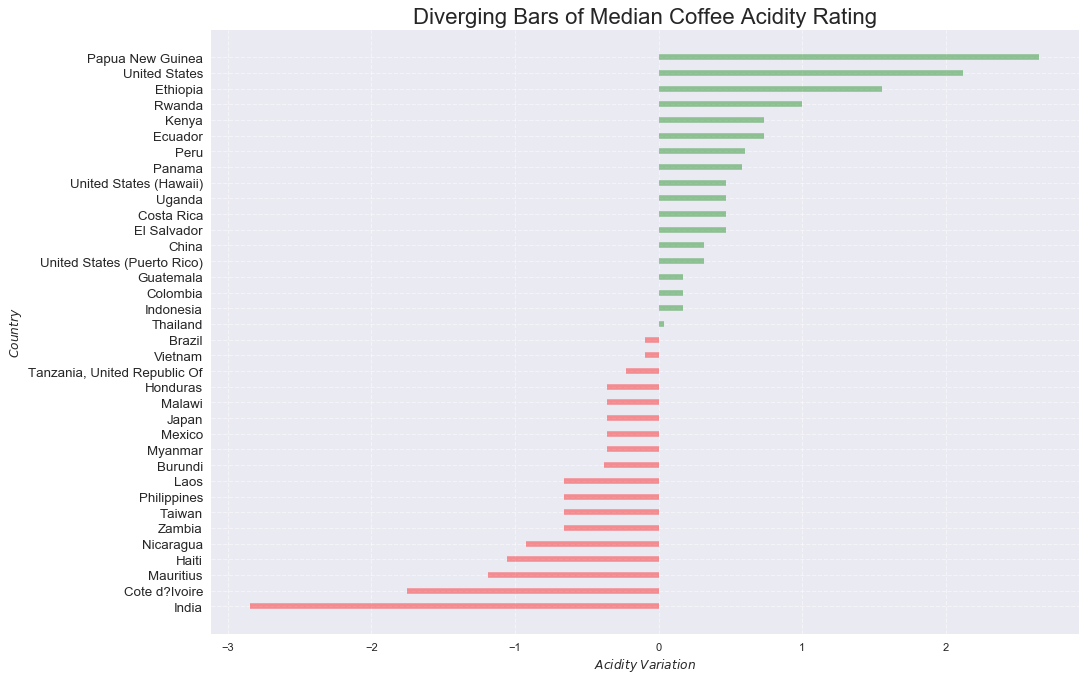

In [8]:
feature_to_chart = 'Acidity'
xlabel = '${0}$ $Variation$'.format(feature_to_chart)
title = 'Diverging Bars of Median Coffee {0} Rating'.format(feature_to_chart)

generate_chart(feature_to_chart, xlabel, title)

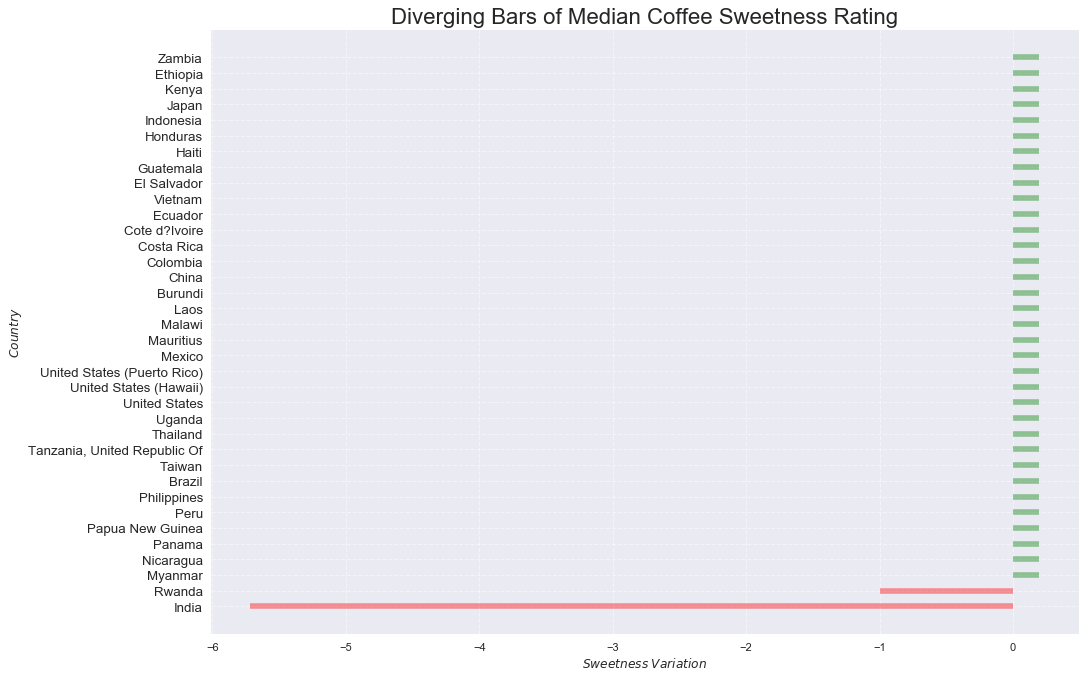

In [9]:
feature_to_chart = 'Sweetness'
xlabel = '${0}$ $Variation$'.format(feature_to_chart)
title = 'Diverging Bars of Median Coffee {0} Rating'.format(feature_to_chart)

generate_chart(feature_to_chart, xlabel, title)